In [ ]:
!pip install pandas matplotlib seaborn gensim nltk wordcloud

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora
import nltk
from nltk.corpus import stopwords

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

# Load data
file_path = 'FA_improve.csv'  # Update with your file path
df = pd.read_csv(file_path)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print("Data Shape:", df.shape)
print("Data Types:\n", df.dtypes)


Data Shape: (189, 4)
Data Types:
 title       object
selftext    object
comments    object
url         object
dtype: object


In [ ]:
df.head()

,title,selftext,comments,url
0,"""Get a better personality!""",What does it actually mean to improve your per...,['I’m always amazed by how much attractive peo...,https://www.reddit.com/r/ForeverAlone/comments...
1,When does it get better?,NaN,"[""I'm 26. I asked when it would get better ten...",https://i.imgur.com/c0U21Y3.png
2,It doesn't get any better with age...,I just turned 35 last week and I unfortunately...,"['[deleted]', ""Yeah, the reality of life set i...",https://www.reddit.com/r/ForeverAlone/comments...
3,A partner won't make your life better,That statement has been thrown around and I've...,"[""The hormones released in your brain during c...",https://www.reddit.com/r/ForeverAlone/comments...
4,Hopefully next year will be better,NaN,"[""I would like both to be done in quick succes...",https://imgur.com/tBQKeIU


In [ ]:
#delete url column
df.drop('url', axis=1, inplace=True)

In [ ]:
#combine title, selftext and comments columns
df['text'] = df['title'] + ' ' + df['selftext'] + ' ' + df['comments']


In [ ]:
df.head()

,title,selftext,comments,text
0,"""Get a better personality!""",What does it actually mean to improve your per...,['I’m always amazed by how much attractive peo...,"""Get a better personality!"" What does it actua..."
1,When does it get better?,NaN,"[""I'm 26. I asked when it would get better ten...",NaN
2,It doesn't get any better with age...,I just turned 35 last week and I unfortunately...,"['[deleted]', ""Yeah, the reality of life set i...",It doesn't get any better with age... I just t...
3,A partner won't make your life better,That statement has been thrown around and I've...,"[""The hormones released in your brain during c...",A partner won't make your life better That sta...
4,Hopefully next year will be better,NaN,"[""I would like both to be done in quick succes...",NaN


In [ ]:
#drop title , selftext and comments columns
df.drop(['title', 'selftext', 'comments'], axis=1, inplace=True)
df.head()

,text
0,"""Get a better personality!"" What does it actua..."
1,NaN
2,It doesn't get any better with age... I just t...
3,A partner won't make your life better That sta...
4,NaN


In [ ]:
# Convert to lowercase
df['text'] = df['text'].str.lower()

In [ ]:
import re
# Convert the column to string type
df['text'] = df['text'].astype(str)
# Remove punctuation and numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', ' ', x))
# Remove URLs
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))

# Remove special characters
df['text'] = df['text'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', ' ', x))

In [ ]:
# Replace NaNs with empty strings
df['text'] = df['text'].fillna('')

# Tokenization
df['tokens'] = df['text'].apply(lambda x: simple_preprocess(x, deacc=True))

In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')
# Remove stopwords
stop_words = set(stopwords.words('english'))
custom_stopwords = {'someth','much','could','also','work','well','feel','better','person','need','someon','improve','improv','like', 'would', 'look', 'good', 'people','thing','even','think','make','time','year','self','life','know' , 'still', 'point', 'want','really'}
stop_words= stop_words.union(custom_stopwords)

#lemmatize and stem
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_and_stem(tokens):
   lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
   stemmed_tokens = [stemmer.stem(word) for word in lemmatized_tokens if word.lower() not in stop_words]
     # Remove words with 3 or fewer characters
   filtered_tokens = [word for word in stemmed_tokens if len(word) > 3]
   return filtered_tokens

df['tokens'] = df['tokens'].apply(lemmatize_and_stem)



[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Join tokens back to text for TF-IDF vectorizer
df['cleaned_text'] = df['tokens'].apply(lambda x: ' '.join(x))

!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

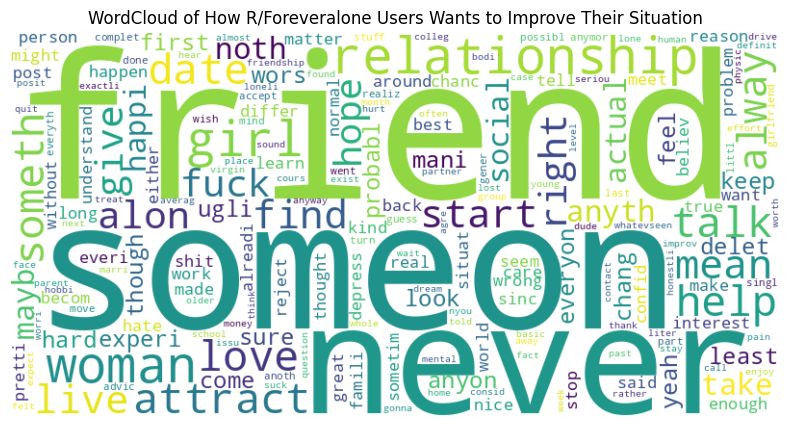

In [ ]:
# Data Visualization
# WordCloud
all_words = ' '.join([word for tokens in df['tokens'] for word in tokens])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of How R/Foreveralone Users Wants to Improve Their Situation")
plt.show()

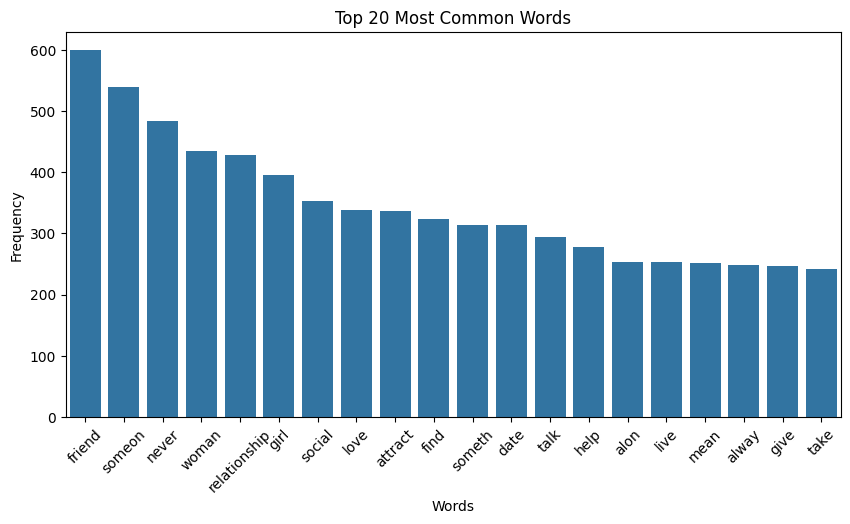

In [ ]:
# Frequency Distribution of Words
all_words_flat = [word for tokens in df['tokens'] for word in tokens]
freq_dist = nltk.FreqDist(all_words_flat)
most_common = freq_dist.most_common(20)

plt.figure(figsize=(10, 5))
sns.barplot(x=[word for word, _ in most_common], y=[count for _, count in most_common])
plt.title("Top 20 Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create Dictionary and Corpus for LDA
from gensim.corpora import Dictionary

# Create a dictionary
dictionary = Dictionary(df['tokens'])

# Create the corpus
corpus = [dictionary.doc2bow(doc) for doc in df['tokens']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Function to compute coherence and perplexity scores
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        model_list.append(model)
        coherence_model = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        perplexity_values.append(model.log_perplexity(corpus))
    return model_list, coherence_values, perplexity_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


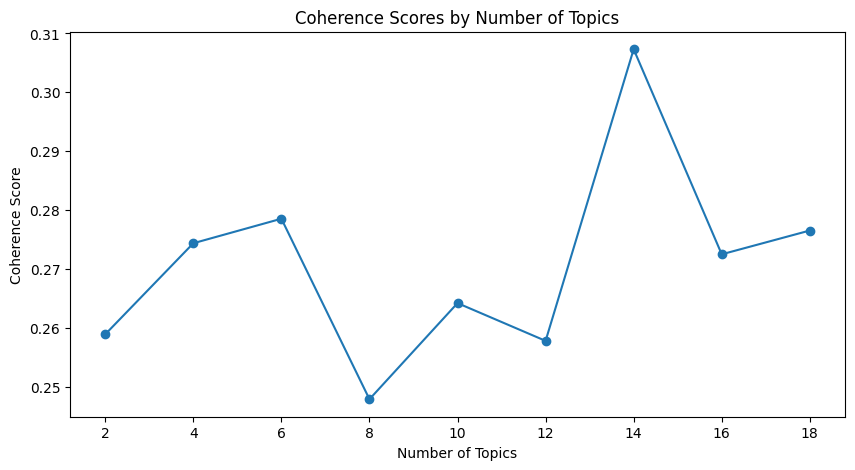

In [ ]:
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary, corpus, df['tokens'], limit=20, start=2, step=2)

# Plot Coherence Scores
x = range(2, 20, 2)
plt.figure(figsize=(10, 5))
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores by Number of Topics")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


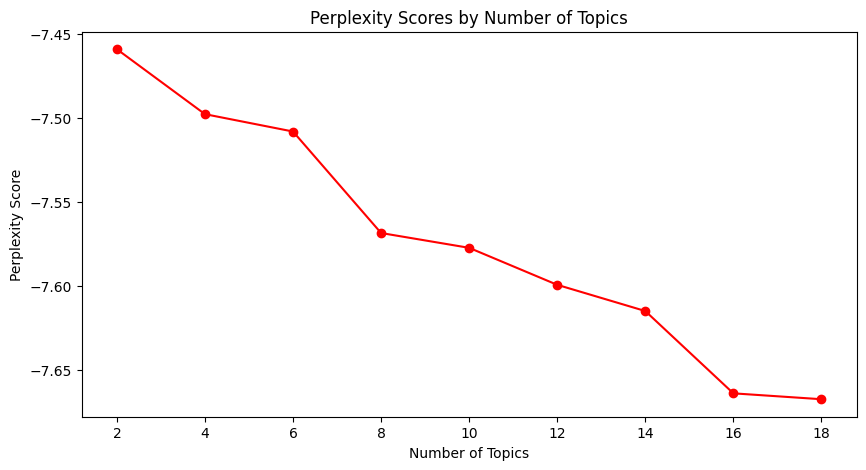

In [ ]:
# Plot Perplexity Scores
plt.figure(figsize=(10, 5))
plt.plot(x, perplexity_values, marker='o', color='red')
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.title("Perplexity Scores by Number of Topics")
plt.show()

In [ ]:
from gensim.models import LdaModel
from pprint import pprint

cleaned_text = df['tokens']
topic_num = 14
word_num = 10

# Create document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in cleaned_text]

# Create LDA model
Lda = gensim.models.ldamodel.LdaModel
ldamodel = LdaModel(doc_term_matrix, num_topics=topic_num, id2word=dictionary, passes=20)

pprint(ldamodel.print_topics(num_topics=topic_num, num_words=word_num))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.040*"reject" + 0.024*"loneli" + 0.011*"friend" + 0.008*"wors" + '
  '0.007*"never" + 0.006*"talk" + 0.006*"lone" + 0.006*"rather" + '
  '0.006*"event" + 0.006*"parent"'),
 (1,
  '0.021*"friend" + 0.013*"school" + 0.007*"worri" + 0.005*"start" + '
  '0.005*"social" + 0.005*"alway" + 0.005*"worst" + 0.005*"asshol" + '
  '0.005*"mask" + 0.004*"girl"'),
 (2,
  '0.014*"friend" + 0.007*"someon" + 0.007*"alon" + 0.006*"relationship" + '
  '0.006*"feel" + 0.006*"other" + 0.005*"someth" + 0.005*"social" + '
  '0.005*"find" + 0.005*"love"'),
 (3,
  '0.012*"relationship" + 0.009*"someon" + 0.008*"look" + 0.006*"date" + '
  '0.006*"girl" + 0.006*"talk" + 0.006*"friend" + 0.005*"boyfriend" + '
  '0.005*"cheat" + 0.005*"right"'),
 (4,
  '0.018*"relationship" + 0.012*"love" + 0.007*"partner" + 0.007*"never" + '
  '0.007*"someon" + 0.006*"alon" + 0.006*"fuck" + 0.006*"imgur" + 0.005*"mani" '
  '+ 0.005*"alway"'),
 (5,
  '0.012*"attract" + 0.011*"someon" + 0.011*"ugli" + 0.011*"woman" + '
  '

In [ ]:
# Calculate coherence using CoherenceModel
coherence_model = gensim.models.CoherenceModel(model=ldamodel, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Perplexity: ', ldamodel.log_perplexity(corpus))
print('Coherence: ', coherence_score)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity:  -7.62016293628732
Coherence:  0.25818718309986705


In [ ]:
# Function to get topics for each document
def get_topics_for_documents(lda_model, corpus):
    topics_for_docs = []
    for doc in corpus:
        topics = lda_model.get_document_topics(doc)
        topics_for_docs.append(topics)
    return topics_for_docs

# Get topics for each document
topics_for_docs = get_topics_for_documents(ldamodel, corpus)

# Create a dictionary to store the document topics
dic_topic_doc = {}
for i in range(len(topics_for_docs)):
    for topic in topics_for_docs[i]:
        if topic[0] not in dic_topic_doc:
            dic_topic_doc[topic[0]] = []
        dic_topic_doc[topic[0]].append((i, topic[1])) # Store document index and topic probability

from IPython.display import display, Markdown
topic_doc_list = pd.DataFrame(columns=['Topic Id','Num of Documents',
                                       'Topic Words','List of Documents'])
print('\nTopic id, number of documents, list of documents with probability and represented topic words:')

for key, value in dic_topic_doc.items():
  sorted_value = sorted(value, key=lambda x: x[1], reverse=True)
  new_row = {'Topic Id': key,
             'Num of Documents': len(value),
             'Topic Words': ldamodel.print_topic(key, word_num),
             'List of Documents': ','.join(map(str,sorted_value))}
  # Concatenate with empty DataFrame to avoid reseting index
  topic_doc_list = pd.concat([topic_doc_list, pd.DataFrame([new_row])])
  # Alternative: Use append method (without ignore_index=True)
  # topic_doc_list = topic_doc_list.append(new_row)

display(Markdown(topic_doc_list.sort_values(by=['Topic Id']).to_markdown()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topic id, number of documents, list of documents with probability and represented topic words:


|    |   Topic Id |   Num of Documents | Topic Words                                                                                                                                                                | List of Documents                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
|---:|-----------:|-------------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 |          0 |                 25 | 0.040*"reject" + 0.024*"loneli" + 0.011*"friend" + 0.008*"wors" + 0.007*"never" + 0.006*"talk" + 0.006*"lone" + 0.006*"rather" + 0.006*"event" + 0.006*"parent"            | (95, 0.995891),(39, 0.9859296),(133, 0.9511234),(1, 0.071428575),(4, 0.071428575),(5, 0.071428575),(10, 0.071428575),(22, 0.071428575),(27, 0.071428575),(29, 0.071428575),(33, 0.071428575),(71, 0.071428575),(74, 0.071428575),(78, 0.071428575),(81, 0.071428575),(98, 0.071428575),(106, 0.071428575),(113, 0.071428575),(128, 0.071428575),(155, 0.071428575),(172, 0.071428575),(173, 0.071428575),(176, 0.071428575),(184, 0.071428575),(185, 0.071428575)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
|  0 |          1 |                 23 | 0.021*"friend" + 0.013*"school" + 0.007*"worri" + 0.005*"start" + 0.005*"social" + 0.005*"alway" + 0.005*"worst" + 0.005*"asshol" + 0.005*"mask" + 0.004*"girl"            | (123, 0.99376756),(1, 0.071428575),(4, 0.071428575),(5, 0.071428575),(10, 0.071428575),(22, 0.071428575),(27, 0.071428575),(29, 0.071428575),(33, 0.071428575),(71, 0.071428575),(74, 0.071428575),(78, 0.071428575),(81, 0.071428575),(98, 0.071428575),(106, 0.071428575),(113, 0.071428575),(128, 0.071428575),(155, 0.071428575),(172, 0.071428575),(173, 0.071428575),(176, 0.071428575),(184, 0.071428575),(185, 0.071428575)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
|  0 |          2 |                 41 | 0.014*"friend" + 0.007*"someon" + 0.007*"alon" + 0.006*"relationship" + 0.006*"feel" + 0.006*"other" + 0.005*"someth" + 0.005*"social" + 0.005*"find" + 0.005*"love"       | (186, 0.99848974),(83, 0.99781454),(164, 0.9973309),(137, 0.99692446),(161, 0.99613005),(23, 0.99559826),(57, 0.9945363),(139, 0.99061716),(108, 0.98727745),(180, 0.9857121),(42, 0.9837065),(110, 0.9617237),(121, 0.7815835),(85, 0.77131885),(99, 0.5138748),(67, 0.33079067),(88, 0.1267303),(1, 0.071428575),(4, 0.071428575),(5, 0.071428575),(10, 0.071428575),(22, 0.071428575),(27, 0.071428575),(29, 0.071428575),(33, 0.071428575),(71, 0.071428575),(74, 0.071428575),(78, 0.071428575),(81, 0.071428575),(98, 0.071428575),(106, 0.071428575),(113, 0.071428575),(128, 0.071428575),(155, 0.071428575),(172, 0.071428575),(173, 0.071428575),(176, 0.071428575),(184, 0.071428575),(185, 0.071428575),(9, 0.06593585),(17, 0.037731934)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|  0 |          3 |                 48 | 0.012*"relationship" + 0.009*"someon" + 0.008*"look" + 0.006*"date" + 0.006*"girl" + 0.006*"talk" + 0.006*"friend" + 0.005*"boyfriend" + 0.005*"cheat" + 0.005*"right"     | (93, 0.99943566),(152, 0.99892116),(104, 0.99808073),(7, 0.99758726),(51, 0.9974552),(96, 0.9959609),(75, 0.99311936),(151, 0.992963),(45, 0.99163115),(46, 0.987276),(32, 0.8969255),(153, 0.86802703),(52, 0.81866634),(107, 0.73075175),(15, 0.56930906),(31, 0.554143),(165, 0.4944182),(157, 0.41781196),(64, 0.40075085),(40, 0.36930656),(142, 0.3486364),(132, 0.33329773),(18, 0.1244944),(1, 0.071428575),(4, 0.071428575),(5, 0.071428575),(10, 0.071428575),(22, 0.071428575),(27, 0.071428575),(29, 0.071428575),(33, 0.071428575),(71, 0.071428575),(74, 0.071428575),(78, 0.071428575),(81, 0.071428575),(98, 0.071428575),(106, 0.071428575),(113, 0.071428575),(128, 0.071428575),(155, 0.071428575),(172, 0.071428575),(173, 0.071428575),(176, 0.071428575),(184, 0.071428575),(185, 0.071428575),(67, 0.04407738),(82, 0.041853365),(143, 0.02921288)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
|  0 |          4 |                 31 | 0.018*"relationship" + 0.012*"love" + 0.007*"partner" + 0.007*"never" + 0.007*"someon" + 0.006*"alon" + 0.006*"fuck" + 0.006*"imgur" + 0.005*"mani" + 0.005*"alway"        | (16, 0.9982207),(160, 0.9977401),(28, 0.99614626),(102, 0.99521244),(3, 0.81581837),(11, 0.7220273),(129, 0.4616487),(85, 0.22643071),(18, 0.09093133),(1, 0.071428575),(4, 0.071428575),(5, 0.071428575),(10, 0.071428575),(22, 0.071428575),(27, 0.071428575),(29, 0.071428575),(33, 0.071428575),(71, 0.071428575),(74, 0.071428575),(78, 0.071428575),(81, 0.071428575),(98, 0.071428575),(106, 0.071428575),(113, 0.071428575),(128, 0.071428575),(155, 0.071428575),(172, 0.071428575),(173, 0.071428575),(176, 0.071428575),(184, 0.071428575),(185, 0.071428575)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|  0 |          5 |                 41 | 0.012*"attract" + 0.011*"someon" + 0.011*"ugli" + 0.011*"woman" + 0.009*"girl" + 0.009*"virgin" + 0.007*"mean" + 0.007*"date" + 0.006*"find" + 0.006*"help"                | (91, 0.99885756),(19, 0.9980403),(117, 0.9978549),(174, 0.9964138),(59, 0.98917854),(13, 0.9848497),(87, 0.9820285),(62, 0.8636799),(171, 0.62555516),(60, 0.5460771),(130, 0.31199366),(2, 0.28229415),(55, 0.27955586),(17, 0.1922305),(121, 0.1794448),(14, 0.1642834),(165, 0.10508146),(25, 0.09505057),(1, 0.071428575),(4, 0.071428575),(5, 0.071428575),(10, 0.071428575),(22, 0.071428575),(27, 0.071428575),(29, 0.071428575),(33, 0.071428575),(71, 0.071428575),(74, 0.071428575),(78, 0.071428575),(81, 0.071428575),(98, 0.071428575),(106, 0.071428575),(113, 0.071428575),(128, 0.071428575),(155, 0.071428575),(172, 0.071428575),(173, 0.071428575),(176, 0.071428575),(184, 0.071428575),(185, 0.071428575),(177, 0.038781166)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
|  0 |          6 |                 37 | 0.015*"blood" + 0.013*"someon" + 0.010*"attract" + 0.009*"person" + 0.009*"donat" + 0.007*"ugli" + 0.006*"give" + 0.006*"relationship" + 0.006*"becom" + 0.005*"take"      | (0, 0.9993724),(134, 0.99908215),(90, 0.8680099),(30, 0.7314659),(109, 0.6876352),(181, 0.5354351),(129, 0.49024147),(97, 0.24169743),(65, 0.1661136),(66, 0.14301835),(147, 0.1403709),(153, 0.10598013),(114, 0.095794216),(84, 0.08478599),(166, 0.07528541),(1, 0.071428575),(4, 0.071428575),(5, 0.071428575),(10, 0.071428575),(22, 0.071428575),(27, 0.071428575),(29, 0.071428575),(33, 0.071428575),(71, 0.071428575),(74, 0.071428575),(78, 0.071428575),(81, 0.071428575),(98, 0.071428575),(106, 0.071428575),(113, 0.071428575),(128, 0.071428575),(155, 0.071428575),(172, 0.071428575),(173, 0.071428575),(176, 0.071428575),(184, 0.071428575),(185, 0.071428575)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
|  0 |          7 |                119 | 0.013*"friend" + 0.010*"never" + 0.009*"someon" + 0.009*"girl" + 0.008*"woman" + 0.006*"date" + 0.006*"someth" + 0.006*"love" + 0.006*"talk" + 0.006*"relationship"        | (140, 0.999406),(12, 0.9992434),(163, 0.99907285),(125, 0.99895936),(118, 0.99890685),(6, 0.9988846),(158, 0.99852276),(183, 0.9985112),(187, 0.9982762),(43, 0.99819595),(50, 0.9981709),(48, 0.9981637),(156, 0.9978973),(179, 0.99785894),(26, 0.9977113),(112, 0.9976947),(170, 0.99761724),(58, 0.99752915),(119, 0.9974956),(34, 0.997069),(168, 0.9969735),(94, 0.99658346),(169, 0.9956172),(21, 0.9955549),(126, 0.9952833),(92, 0.9951356),(162, 0.99436843),(63, 0.9942282),(178, 0.99367815),(124, 0.99336416),(100, 0.9930666),(103, 0.9929063),(127, 0.99256796),(61, 0.9886707),(37, 0.9834897),(143, 0.96919584),(73, 0.9653164),(9, 0.9275669),(84, 0.9131067),(114, 0.90262604),(25, 0.8967818),(66, 0.85488486),(49, 0.84133387),(14, 0.83492756),(65, 0.8170719),(82, 0.76775336),(41, 0.7627067),(97, 0.7519504),(86, 0.7354785),(182, 0.7309892),(54, 0.73021746),(147, 0.72411597),(55, 0.7197016),(2, 0.71709806),(138, 0.6992643),(130, 0.6858133),(88, 0.6833431),(132, 0.6620916),(8, 0.6557452),(142, 0.6471395),(18, 0.64664924),(67, 0.6237928),(145, 0.62237954),(120, 0.59461975),(40, 0.5856102),(17, 0.5780785),(166, 0.5590583),(136, 0.5338654),(175, 0.5180403),(99, 0.46102008),(181, 0.4603827),(44, 0.45163435),(31, 0.4448517),(15, 0.42735443),(165, 0.3993577),(105, 0.37877598),(69, 0.36314574),(171, 0.36253694),(109, 0.3074366),(11, 0.2761048),(107, 0.26720187),(30, 0.26524907),(154, 0.25999376),(135, 0.18445596),(3, 0.18332852),(52, 0.17794456),(90, 0.1304227),(38, 0.12980345),(62, 0.12899156),(32, 0.10072532),(177, 0.09451381),(148, 0.08532081),(1, 0.071428575),(4, 0.071428575),(5, 0.071428575),(10, 0.071428575),(22, 0.071428575),(27, 0.071428575),(29, 0.071428575),(33, 0.071428575),(71, 0.071428575),(74, 0.071428575),(78, 0.071428575),(81, 0.071428575),(98, 0.071428575),(106, 0.071428575),(113, 0.071428575),(128, 0.071428575),(155, 0.071428575),(172, 0.071428575),(173, 0.071428575),(176, 0.071428575),(184, 0.071428575),(185, 0.071428575),(188, 0.053391673),(129, 0.045371253),(110, 0.03710026),(144, 0.02230315),(87, 0.017069051) |
|  0 |          8 |                 53 | 0.010*"social" + 0.007*"help" + 0.007*"happi" + 0.006*"never" + 0.006*"alon" + 0.006*"love" + 0.006*"hope" + 0.005*"keep" + 0.005*"live" + 0.005*"someon"                  | (20, 0.9984871),(47, 0.9979126),(167, 0.99788874),(111, 0.9977778),(35, 0.9948681),(122, 0.9919224),(150, 0.9905215),(80, 0.984519),(115, 0.9821378),(144, 0.9764738),(148, 0.9112632),(177, 0.86479264),(135, 0.81058806),(69, 0.6357304),(105, 0.6155831),(64, 0.588662),(157, 0.5705996),(175, 0.4757066),(136, 0.4580452),(145, 0.37486312),(166, 0.3651276),(60, 0.34157026),(182, 0.26694462),(88, 0.18776707),(18, 0.13582885),(147, 0.13311611),(1, 0.071428575),(4, 0.071428575),(5, 0.071428575),(10, 0.071428575),(22, 0.071428575),(27, 0.071428575),(29, 0.071428575),(33, 0.071428575),(71, 0.071428575),(74, 0.071428575),(78, 0.071428575),(81, 0.071428575),(98, 0.071428575),(106, 0.071428575),(113, 0.071428575),(128, 0.071428575),(155, 0.071428575),(172, 0.071428575),(173, 0.071428575),(176, 0.071428575),(184, 0.071428575),(185, 0.071428575),(40, 0.043766186),(73, 0.033545937),(99, 0.022449713),(37, 0.015071225),(13, 0.013248945)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
|  0 |          9 |                 24 | 0.007*"mask" + 0.005*"famili" + 0.004*"woman" + 0.004*"ever" + 0.004*"look" + 0.004*"date" + 0.004*"happen" + 0.004*"fuck" + 0.004*"singl" + 0.004*"last"                  | (53, 0.9894471),(24, 0.9854897),(1, 0.071428575),(4, 0.071428575),(5, 0.071428575),(10, 0.071428575),(22, 0.071428575),(27, 0.071428575),(29, 0.071428575),(33, 0.071428575),(71, 0.071428575),(74, 0.071428575),(78, 0.071428575),(81, 0.071428575),(98, 0.071428575),(106, 0.071428575),(113, 0.071428575),(128, 0.071428575),(155, 0.071428575),(172, 0.071428575),(173, 0.071428575),(176, 0.071428575),(184, 0.071428575),(185, 0.071428575)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
|  0 |         10 |                 29 | 0.013*"clown" + 0.009*"home" + 0.009*"laugh" + 0.008*"attract" + 0.008*"mean" + 0.007*"alon" + 0.007*"leav" + 0.006*"never" + 0.006*"famili" + 0.006*"unattract"           | (36, 0.9967866),(76, 0.99219596),(89, 0.9889437),(131, 0.987939),(56, 0.9865409),(188, 0.9417922),(17, 0.1887829),(1, 0.071428575),(4, 0.071428575),(5, 0.071428575),(10, 0.071428575),(22, 0.071428575),(27, 0.071428575),(29, 0.071428575),(33, 0.071428575),(71, 0.071428575),(74, 0.071428575),(78, 0.071428575),(81, 0.071428575),(98, 0.071428575),(106, 0.071428575),(113, 0.071428575),(128, 0.071428575),(155, 0.071428575),(172, 0.071428575),(173, 0.071428575),(176, 0.071428575),(184, 0.071428575),(185, 0.071428575)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
|  0 |         11 |                 27 | 0.013*"contact" + 0.010*"find" + 0.010*"attract" + 0.008*"woman" + 0.006*"becom" + 0.006*"cours" + 0.006*"interest" + 0.006*"ugli" + 0.006*"someon" + 0.006*"unattract"    | (116, 0.9961464),(68, 0.99506015),(79, 0.9897944),(38, 0.8682121),(8, 0.34284902),(1, 0.071428575),(4, 0.071428575),(5, 0.071428575),(10, 0.071428575),(22, 0.071428575),(27, 0.071428575),(29, 0.071428575),(33, 0.071428575),(71, 0.071428575),(74, 0.071428575),(78, 0.071428575),(81, 0.071428575),(98, 0.071428575),(106, 0.071428575),(113, 0.071428575),(128, 0.071428575),(155, 0.071428575),(172, 0.071428575),(173, 0.071428575),(176, 0.071428575),(184, 0.071428575),(185, 0.071428575)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
|  0 |         12 |                 32 | 0.009*"never" + 0.008*"friend" + 0.008*"noth" + 0.008*"woman" + 0.007*"alcohol" + 0.007*"experi" + 0.006*"anyon" + 0.006*"ever" + 0.006*"love" + 0.006*"laugh"             | (149, 0.99764884),(146, 0.9950069),(101, 0.99262923),(159, 0.9901469),(77, 0.9831144),(120, 0.3696588),(41, 0.21586056),(82, 0.18261085),(49, 0.15370995),(60, 0.10399109),(1, 0.071428575),(4, 0.071428575),(5, 0.071428575),(10, 0.071428575),(22, 0.071428575),(27, 0.071428575),(29, 0.071428575),(33, 0.071428575),(71, 0.071428575),(74, 0.071428575),(78, 0.071428575),(81, 0.071428575),(98, 0.071428575),(106, 0.071428575),(113, 0.071428575),(128, 0.071428575),(155, 0.071428575),(172, 0.071428575),(173, 0.071428575),(176, 0.071428575),(184, 0.071428575),(185, 0.071428575)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
|  0 |         13 |                 30 | 0.017*"social" + 0.013*"woman" + 0.012*"friend" + 0.008*"ugli" + 0.008*"attract" + 0.008*"parent" + 0.008*"averag" + 0.007*"societi" + 0.006*"live" + 0.006*"relationship" | (72, 0.99815726),(141, 0.99806106),(70, 0.99652153),(154, 0.7368544),(44, 0.5450682),(138, 0.29768407),(54, 0.2662682),(86, 0.25978446),(1, 0.071428575),(4, 0.071428575),(5, 0.071428575),(10, 0.071428575),(22, 0.071428575),(27, 0.071428575),(29, 0.071428575),(33, 0.071428575),(71, 0.071428575),(74, 0.071428575),(78, 0.071428575),(81, 0.071428575),(98, 0.071428575),(106, 0.071428575),(113, 0.071428575),(128, 0.071428575),(155, 0.071428575),(172, 0.071428575),(173, 0.071428575),(176, 0.071428575),(184, 0.071428575),(185, 0.071428575)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |

In [ ]:
# plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# visualize the topics and keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.097562 -0.019699       1        1  46.172450
3     -0.083515 -0.019014       2        1  10.812535
8     -0.080549 -0.038128       3        1   9.353533
5     -0.093397  0.049564       4        1   8.006231
2     -0.085528 -0.052988       5        1   6.436325
6     -0.059893  0.022477       6        1   6.221961
4     -0.060146 -0.026339       7        1   4.444624
13    -0.018583  0.137139       8        1   2.873820
11     0.025216  0.072147       9        1   1.778897
12     0.036171 -0.053734      10        1   1.517513
10     0.050574 -0.055602      11        1   1.362201
0      0.131278 -0.035586      12        1   0.508493
9      0.171005  0.028849      13        1   0.256527
1      0.164930 -0.009086      14        1   0.254890, topic_info=       Term        Freq       Total Category  logprob  loglift
263  friend  563.000000  563.000000  Default  30.0000  30.0000
552  reject  106.000000  106.000000  Default  29.0000  29.0000
734   woman  406.000000  406.000000  Default  28.0000  28.0000
606  social  327.000000  327.000000  Default  27.0000  27.0000
439   never  459.000000  459.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
276    girl    0.584179  381.207636  Topic14  -5.6056  -0.5088
439   never    0.302766  459.466432  Topic14  -6.2629  -1.3528
648    take    0.302494  225.518802  Topic14  -6.2638  -0.6420
104   chang    0.302380  183.453389  Topic14  -6.2641  -0.4359
762  around    0.302258  154.777348  Topic14  -6.2645  -0.2664

[1081 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
746       1  0.321254  abus
746       2  0.321254  abus
746       3  0.029205  abus
746       5  0.029205  abus
746       6  0.262844  abus
...     ...       ...   ...
1160      1  0.880319  zero
1160      6  0.048907  zero
1160     11  0.048907  zero
2584      1  0.881503  zone
2584      2  0.067808  zone

[2995 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 9, 6, 3, 7, 5, 14, 12, 13, 11, 1, 10, 2])